In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("diabetes.csv")

In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
df.corr()['Outcome']

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

In [15]:
X = df.drop('Outcome',axis=1)

In [17]:
y = df['Outcome']

In [29]:
X.shape , y.shape

((768, 8), (768,))

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [33]:
X_trans = scaler.fit_transform(X)

In [37]:
X_trans.shape

(768, 8)

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_trans,y,test_size=0.2,random_state=1)

In [41]:
X_train.shape ,X_test.shape ,y_train.shape ,y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [73]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [103]:
model = Sequential()
model.add(Input(shape=(8,)))
model.add(Dense(64,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(32,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [105]:
history = model.fit(X_train,y_train,batch_size=32,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5013 - loss: 0.7386 - val_accuracy: 0.7078 - val_loss: 0.5851
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7228 - loss: 0.5517 - val_accuracy: 0.7532 - val_loss: 0.5144
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7248 - loss: 0.5371 - val_accuracy: 0.7922 - val_loss: 0.4932
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7520 - loss: 0.4859 - val_accuracy: 0.7792 - val_loss: 0.4829
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7500 - loss: 0.4909 - val_accuracy: 0.7987 - val_loss: 0.4764
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7637 - loss: 0.4994 - val_accuracy: 0.7987 - val_loss: 0.4735
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7620 - loss: 0.4718 - val_accuracy: 0.7857 - val_loss: 0.4709
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7882 - loss: 0.4477 - val_accuracy: 0.7857 - val_loss:

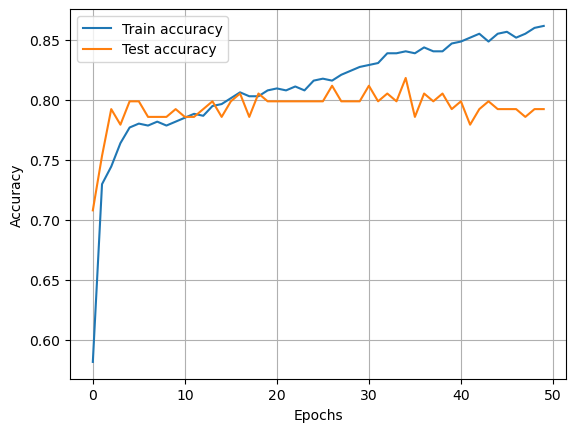

In [113]:
plt.plot(history.history['accuracy'],label='Train accuracy')
plt.plot(history.history['val_accuracy'],label='Test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

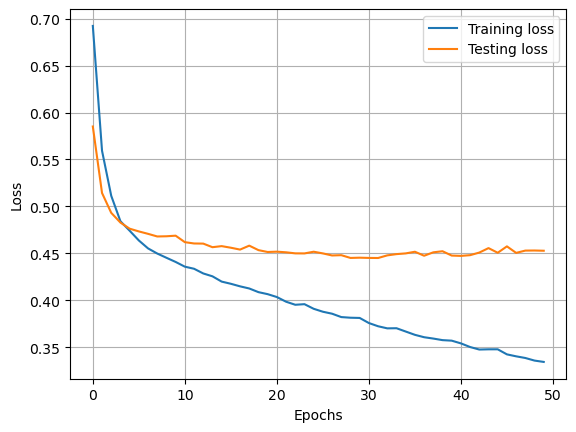

In [115]:
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'],label='Testing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Use keras Tuner for Hyperparameter tuning

In [118]:
# 1 . How to select appropiate optimizer
# 2 . No of nodes in a layer
# 3 . How to select no. of layers
# 4 . All in one model

In [124]:
import keras_tuner as kt

# 1 . How to select appropiate optimizer

In [127]:
def build_model(hp):

    model = Sequential()
    model.add(Input(shape=(8,)))
    model.add(Dense(32,activation='relu',kernel_initializer='he_normal'))
    model.add(Dense(1,activation='sigmoid'))

    # select best optimizers from the list 
    optimizers_list = hp.Choice('optimizers',values = ['adam','sgd','rmsprop','adadelta'])
    model.compile(optimizer=optimizers_list,loss='binary_crossentropy',metrics=['accuracy'])

    return model

In [129]:
# tuner = kt.RandomSearch(build_model,objective='val_accuracy',max_trials=5)

In [137]:
# tuner.search(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

In [165]:
# More Advance code from GPT
from keras_tuner import RandomSearch
from tensorflow.keras.callbacks import EarlyStopping

# Assuming build_model(hp) is already defined

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,            # how many different hyperparameter combinations to try
    executions_per_trial=1,   # number of times to train each model for robustness
    directory='my_tuner_dir',
    project_name='my_model_tuning'
)

# Optional: Stop training early if no improvement
early_stop = EarlyStopping(monitor='val_loss', patience=3)

# Start searching
tuner.search(
    X_train, y_train,
    epochs=10,
    validation_data=(X_test, y_test),
    callbacks=[early_stop]
)

Trial 4 Complete [00h 00m 02s]
val_accuracy: 0.7662337422370911

Best val_accuracy So Far: 0.7857142686843872
Total elapsed time: 00h 00m 10s


In [167]:
tuner.get_best_hyperparameters()[0].values

{'optimizers': 'adam'}

In [169]:
model = tuner.get_best_models(num_models=1)[0]

C:\Users\parvez\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [171]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [173]:
model.fit(X_train,y_train,epochs=100,initial_epoch=11,validation_data=(X_test,y_test))

Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7560 - loss: 0.4960 - val_accuracy: 0.7857 - val_loss: 0.5001
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7883 - loss: 0.4805 - val_accuracy: 0.7857 - val_loss: 0.4957
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7649 - loss: 0.4704 - val_accuracy: 0.7857 - val_loss: 0.4923
Epoch 15/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7750 - loss: 0.4693 - val_accuracy: 0.7727 - val_loss: 0.4909
Epoch 16/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7688 - loss: 0.4833 - val_accuracy: 0.7727 - val_loss: 0.4896
Epoch 17/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7681 - loss: 0.4970 - val_accuracy: 0.7792 - val_loss: 0.4885
Epoch 18/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7911 - loss: 0.4742 - val_accuracy: 0.7792 - val_loss: 0.4877
Epoch 19/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7785 - loss: 0.4595 - val_accuracy: 0.

# 2 . No of nodes in a layer


In [198]:
def build_model(hp):
    
    model = Sequential()

    units = hp.Int('units',min_value=8,max_value=128,step=8)

    model.add(Dense(units=units,activation='relu',input_dim=8))
    model.add(Dense(1,activation='sigmoid'))

    model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

    return model

In [200]:
tuner = kt.RandomSearch(build_model,
                       objective='val_accuracy',
                       max_trials=10,
                       max_retries_per_trial=1,
                       directory='my_tuner_dir',
                       project_name='my_model_tuning_nodes')

C:\Users\parvez\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [204]:
tuner.search(X_train,y_train,epochs=10,validation_data=(X_test,y_test),verbose=1)

Trial 10 Complete [00h 00m 03s]
val_accuracy: 0.798701286315918

Best val_accuracy So Far: 0.8051947951316833
Total elapsed time: 00h 00m 51s


In [220]:
tuner.get_best_hyperparameters()[0].values

{'units': 72}

In [224]:
model = tuner.get_best_models(num_models=1)[0]

C:\Users\parvez\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\parvez\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [226]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 72)                  │             648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              73 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 721 (2.82 KB)

 Trainable params: 721 (2.82 KB)

 Non-trainable params: 0 (0.00 B)

In [228]:
model.fit(X_train,y_train,epochs=100,initial_epoch=11,validation_data=(X_test,y_test))

Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7878 - loss: 0.4305 - val_accuracy: 0.7922 - val_loss: 0.4821
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7612 - loss: 0.4883 - val_accuracy: 0.7922 - val_loss: 0.4805
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7484 - loss: 0.4746 - val_accuracy: 0.7987 - val_loss: 0.4799
Epoch 15/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7525 - loss: 0.4726 - val_accuracy: 0.7922 - val_loss: 0.4803
Epoch 16/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7723 - loss: 0.4415 - val_accuracy: 0.7987 - val_loss: 0.4799
Epoch 17/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7679 - loss: 0.4481 - val_accuracy: 0.7922 - val_loss: 0.4779
Epoch 18/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8006 - loss: 0.4223 - val_accuracy: 0.7857 - val_loss: 0.4808
Epoch 19/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7867 - loss: 0.4526 - val_accuracy: 0.

# 3 . How to select no. of layers

In [237]:
def build_model(hp):
    model = Sequential()
    model.add(Dense(72,activation='relu',input_dim=8))

    for i in range(hp.Int('num_layers',min_value=1,max_value=10)):
        model.add(Dense(72,activation='relu'))

    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [239]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    max_retries_per_trial=1,
    directory='my_tuner_dir',
    project_name='my_model_tuning_layers'
)

C:\Users\parvez\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [242]:
tuner.search(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Trial 5 Complete [00h 00m 03s]
val_accuracy: 0.8116883039474487

Best val_accuracy So Far: 0.8181818127632141
Total elapsed time: 00h 00m 20s


In [248]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 4}

In [250]:
model = tuner.get_best_models(num_models=1)[0]

C:\Users\parvez\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\parvez\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [254]:
model.fit(X_train,y_train,epochs=100,initial_epoch=11,validation_data=(X_test,y_test))

Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9996 - loss: 0.0040 - val_accuracy: 0.7857 - val_loss: 1.7948
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9959 - loss: 0.0092 - val_accuracy: 0.7597 - val_loss: 1.7775
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9962 - loss: 0.0089 - val_accuracy: 0.7662 - val_loss: 1.7960
Epoch 15/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9955 - loss: 0.0074 - val_accuracy: 0.7792 - val_loss: 1.8502
Epoch 16/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9947 - loss: 0.0151 - val_accuracy: 0.7792 - val_loss: 1.8465
Epoch 17/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9966 - loss: 0.0139 - val_accuracy: 0.7597 - val_loss: 1.8560
Epoch 18/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9813 - loss: 0.0485 - val_accuracy: 0.7922 - val_loss: 1.7300
Epoch 19/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9485 - loss: 0.2106 - val_accuracy: 0.

# 4 . All in one model

In [2]:
def build_model(hp):
    model = Sequential()

    counter = 0
    #for finding optimal layers
    for i in range(hp.Int('num_layers',min_value=1,max_value=10)):
        #if it is first layer
        if counter == 0:
            model.add(
                Dense(
                    hp.Int('units'+str(i),min_value=8,max_value=128,steps=8),# for optimal node in every layers
                    activation = hp.Choice('activation'+str(i),values=['relu','tanh','selu']),#optimal activation
                    input_dim=8
                )
            )
        else:
            model.add(
                Dense(
                    hp.Int('units'+str(i),min_value=8,max_value=128,steps=8),# for optimal node in every layers
                    activation = hp.Choice('activation'+str(i),values=['relu','tanh','selu']),#optimal activation
                )
            )
        counter+=1

    model.add(Dense(1,activation='sigmoid'))

    #optimal optimizer
    optimizers_list = hp.Choice('optimizers',values = ['adam','sgd','rmsprop','adadelta'])
    model.compile(optimizer=optimizers_list,loss='binary_crossentropy',metrics=['accuracy'])

    return model

In [4]:
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(8,)))
    #for finding optimal layers
    for i in range(hp.Int('num_layers',min_value=1,max_value=10)):
        #find optimal layers
            model.add(
                Dense(
                    hp.Int('units'+str(i),min_value=8,max_value=128,step=8),# for optimal node in every layers
                    activation = hp.Choice('activation'+str(i),values=['relu','tanh','selu']),#optimal activation
                )
            )
        #find optimal dropout layer value
            model.add(Dropout(hp.Choice('dropout'+str(i),values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
            
    model.add(Dense(1,activation='sigmoid'))

    #optimal optimizer
    optimizers_list = hp.Choice('optimizers',values = ['adam','sgd','rmsprop','adadelta'])
    model.compile(optimizer=optimizers_list,loss='binary_crossentropy',metrics=['accuracy'])

    return model

In [6]:
tuner = kt.RandomSearch(
    build_model,
    objective = 'val_accuracy',
    max_trials=10,
    max_retries_per_trial=1,
    directory='my_tuner_dir_main',
    project_name='my_model_tuning'
)

NameError: name 'kt' is not defined

In [8]:
tuner.search(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

NameError: name 'tuner' is not defined

In [10]:
tuner.get_best_hyperparameters()[0].values

NameError: name 'tuner' is not defined

In [12]:
model = tuner.get_best_models(num_models=1)[0]

NameError: name 'tuner' is not defined

In [14]:
model.summary()

NameError: name 'model' is not defined

In [16]:
# from tensorflow.keras.callbacks import EarlyStopping
# early_stop = EarlyStopping(
#     monitor='val_accuracy',     # or 'val_accuracy'
#     patience=40,             # how many epochs to wait after no improvement
#     restore_best_weights=True  # revert to best weights after training
# )

from tensorflow.keras.callbacks import Callback
import numpy as np

class AccuracyGapEarlyStopping(Callback):
    def __init__(self, threshold=0.01, patience=5):
        super().__init__()
        self.threshold = threshold
        self.patience = patience
        self.wait = 0

    def on_epoch_end(self, epoch, logs=None):
        acc = logs.get('accuracy')
        val_acc = logs.get('val_accuracy')
        gap = abs(acc - val_acc)

        if gap < self.threshold:
            self.wait += 1
            print(f"Accuracy gap {gap:.4f} is below threshold. Patience count: {self.wait}/{self.patience}")
            if self.wait >= self.patience:
                print("Stopping training early due to small accuracy gap.")
                self.model.stop_training = True
        else:
            self.wait = 0  # reset if gap grows


In [18]:
plt.plot(history.history['accuracy'],label='Train accuracy')
plt.plot(history.history['val_accuracy'],label='Test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'plt' is not defined

In [20]:
plt.plot(history.history['loss'],label='Train accuracy')
plt.plot(history.history['val_loss'],label='Test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'plt' is not defined

In [22]:
y_pred = model.predict(X_test)
# Convert to class labels (0 or 1)
y_pred = (y_pred > 0.5).astype("int32")

NameError: name 'model' is not defined

In [24]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy of the model is : ",accuracy)

NameError: name 'y_test' is not defined

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

NameError: name 'y_test' is not defined